# Brownian motion

In [1]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
# Bokeh libraries
from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider, WheelZoomTool, Legend, Span
from bokeh.plotting import ColumnDataSource, figure, output_file, show
from bokeh.palettes import Spectral11, Blues, viridis
from bokeh.io import output_notebook
output_notebook(hide_banner =  True)

In the early 1800's, the botanist Robert Brown studied the apparently random movement of pollen particles suspended in water. This random movement is now called Brownian motion. We can observe similar movements on dust particles floating on air. To introduce Brownian motion, we show below a video of nanoparticles (small particles) in water, as we can see, they jiggle randomly. This random jiggling is what we call Brownian motion, and we thus call these particles Brownian particles.

In [2]:
%%HTML
<video width="400" controls>
  <source src="../_static/lecture_specific/brownian_motion/brownian_motion_nanoparticles_in_water-rutger_saly_youtube.mp4" type="video/mp4">
</video>

Although the movement of Brownian particles is random, we can ask ourselves if there is anything predictable about their movement? If there is some predictable behavior, maybe there is also predictable behavior in other effectively random systems, such as the economy, social networks and molecular biology.

We would like to describe the movement of Brownian particles with a mathematical model. As the formal theory of Brownian motion is quite involved, perhaps a more accesible approach to introduce it is through computational simulations. 

Consider a Brownian particle with its position $x(t)$ a function of time $t$. We assume the particle only moves in one dimension, so it can only move left and right. Given the position at time $t=0$, we would like to calculate its position at a later time, say $t=1$ later. As Brownian motion is random, we expect to add a random number $R$,

$$
x(1) = x(0) + R.
$$

We can apply this formula again and obtain the position at time $t=2$, i.e $x(2)$. In general, for any given $t$, we can simply write

$$
x(t+1) = x(t) + R
$$

However, we still need to specify what we mean by a random number. 

## 1. Random numbers

All randoms number must be sampled from some distribution. One example of sampling a random number is throwing a dice where one can obtain any integer number between $1$ and $6$ with equal probabilities. As getting every number from $1$ to $6$ is equally likely, we say we sample the numbers uniformly or from a uniform distribution. We can easily create a 'digital' dice with python with the function `np.random.randint(1,7)`. The code belows throws the dice five times and prints the results:

In [3]:
for i in range(5):
    dice_result = np.random.randint(1,7)
    print("Throw", i+1, ":", dice_result)

Throw 1 : 2
Throw 2 : 5
Throw 3 : 4
Throw 4 : 2
Throw 5 : 2


To show that out digital dice is fair, we can simply throw the dice many times ($120,000$ times) and plot a histogram for the occurrences of each number. We can do this with the following:

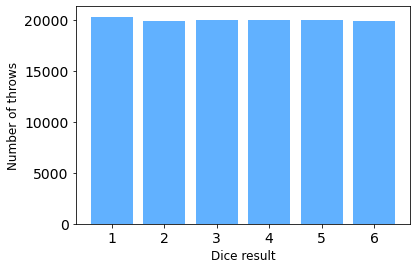

In [4]:
all_results = []
total_throws = 120000
for i in range(total_throws):
    dice_result = np.random.randint(1,7)
    all_results.append(dice_result)
    
# Plot histogram of dice results
num_throws, edges = np.histogram(all_results, bins=range(1,8))
plt.bar(range(1,7), num_throws, alpha = 0.7, color='dodgerblue')
plt.xlabel('Dice result', fontsize = 12);
plt.ylabel('Number of throws', fontsize = 12);

Although with some minor differences, every number in the dice was obtained the same number of times (~$20,000$ times). Thus, it seems it is a fair dice. We can easily translate this histogram into a probability distribution by dividing the number of throws of each number by the total number of throws. Doing this division, we obtain the probability distribution.

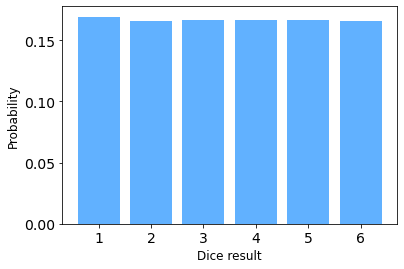

In [5]:
# Plot disitrbution of dice results
plt.bar(range(1,7), num_throws/total_throws, alpha = 0.7, color='dodgerblue')
plt.xlabel('Dice result', fontsize = 12);
plt.ylabel('Probability', fontsize = 12);

The height of each column is around $1/6\approx 0.1666$, and it corresponds to the probability of rolling any given  number in the dice. The probability of rolling any number from $1$ to $6$ is the sum of the probabilities of each number. This means $1/6 + 1/6 + 1/6 + 1/6 + 1/6 + 1/6 = 1$. This is a universal property of probabilities. The probabilities of all the possible events, should always sum to one.

### 1.1 Uniform distribution

Random numbers are not limited to integer values like in a dice. For instance the function `np.random.uniform(xmin,xmax)` samples a random number uniformly in the interval $[xmin, xmax)$. We sample five values of this function with $x_\text{min} = 0$ and $x_\text{max}=100$:

In [6]:
xmin = 0
xmax = 100
for i in range(5):
    random_number = np.random.uniform(xmin,xmax)
    print("Trial", i+1, ":", random_number)

Trial 1 : 89.57222419626513
Trial 2 : 0.009230252899783409
Trial 3 : 71.5746593654441
Trial 4 : 67.51394505203622
Trial 5 : 78.19335640799416


We now show that the distribution of these numbers follows a uniform probability distribution. To do so, we separate our domain in $30$ bins to plot the histogram as before. To make sure it corresponds to a probability, we pass the argument `density=True` to the plotting function. This takes care of dividing the counts for each bin by the total number of trials automatically.

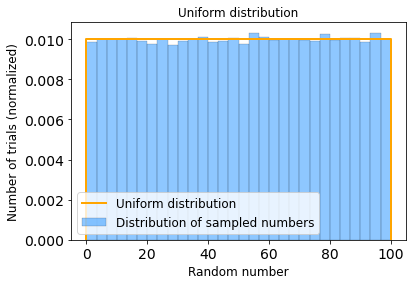

In [7]:
all_numbers = []
total_trials = 100000
for i in range(total_trials):
    random_number = np.random.uniform(xmin,xmax)
    all_numbers.append(random_number)
    
# Plot histogram/distribution of random numbers
plt.hist(all_numbers, bins=30, density = True, alpha = 0.5, 
         edgecolor='black', lw = 0.3, color='dodgerblue', label="Distribution of sampled numbers")
plt.plot([xmin, xmin,xmax, xmax], [0, 1/(xmax - xmin),1/(xmax - xmin), 0], lw =2, 
         label="Uniform distribution", color='orange')
plt.title('Uniform distribution', fontsize = 12)
plt.xlabel('Random number', fontsize = 12);
plt.ylabel('Number of trials (normalized)', fontsize = 12);
plt.legend(fontsize = 12)

This distribution followed by the sampling numbers corresponds to a uniform distribution since every real number between $x_\text{min}$ and $x_\text{max}$ is sampled uniformly. Also note the area covered by the histogram is around $0.01 \times 100 = 1$, in the same way as the probabilities of all the numbers in the dice sum to one. In general, we can represent the uniform distribution as a constant line, as plotted in the previous figure:

$$
\rho_\text{uniform} = 1/(x_\text{max} - x_\text{min})
$$ 

with $x$ between $x_\text{min}$ and $x_\text{max}$, such that the area covered by the distribution, or more precisely, the integral of the distribution is equal to 1:

$$
\int_{x_\text{min}}^{x_\text{max}}\rho_\text{uniform}dx = \frac{x_\text{max} - x_\text{min}}{x_\text{max} - x_\text{min}} = 1
$$

### 1.2 Normal distribution

Another famous distribution is the normal or Gaussian distribution. This distribution has the following form

$$
\rho_\text{normal}(x)=\frac{1}{\sigma\sqrt{2\pi}}\exp \Big( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2 \Big),
$$

where $\mu$ corresponds to the mean and $\sigma$ to the standard deviation. It can be shown its integral from $-\infty$ to $\infty$ is always equal to one. Plotting this function, we obtain the shape of the normal distirbution. Try changing the mean and the variance to see how the distribution changes.

In [29]:
# Bokeh interactive plot code for normal distribution
x = np.linspace(-4,4,80)
y = 1/(np.sqrt(2 * np.pi)) * np.exp(-0.5*x**2)
source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(x_range=(-4, 4), y_range=(0, 1), plot_width=400, plot_height=300, tools="pan,wheel_zoom,reset")
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6, color='orange')
plot.title.text = 'Normal distribution'
plot.title.text_font_size = '12pt'
plot.toolbar.logo = None

mu_slider = Slider(start=-3.5, end=3.5, value=0, step=.1, title="Mean")
sigma_slider = Slider(start=0.1, end=3, value=1, step=.1, title="Standard deviation")

callback = CustomJS(args=dict(source=source, mu=mu_slider, sigma=sigma_slider),
                    code="""
    const data = source.data;
    const mean = mu.value;
    const stddev = sigma.value;
    const x = data['x']
    const y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = 1/(stddev * Math.sqrt(2 * Math.PI)) * Math.exp(-0.5*((x[i]-mean)/stddev)**2)
    }
    source.change.emit();
""")

mu_slider.js_on_change('value', callback)
sigma_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(mu_slider, sigma_slider),
)

show(layout)

This distirbution implies that numbers closer to the mean value $\mu$ are much more likely to be sampled than those far away from the mean value. In python one can easily draw random numbers following this distribution by using the `np.random.normal(mu,sigma)` function:

In [9]:
mu = 0
sigma = 1
for i in range(5):
    random_number = np.random.normal(mu,sigma)
    print("Trial", i+1, ":", random_number)

Trial 1 : -0.1638268680095995
Trial 2 : -0.6923420808168518
Trial 3 : 0.8098346343932747
Trial 4 : -1.965686328805457
Trial 5 : 0.5241965195692059


We denote a random number sampled from this distribution as $\mathcal{N}(\mu,\sigma)$, where $\sigma^2$ is the variance and corresponds to the standard deviation squared. It is easy to test the sampled numbers actually follow a normal distribution. Lets sample a large number of values with this function and plot their distribution as before:

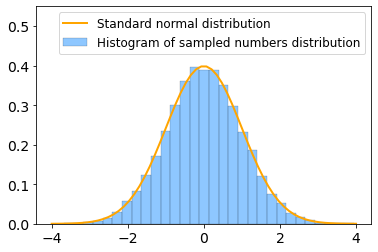

In [10]:
# Sample random values from a standard normal distibution
values = []
num_samples = 12000
for i in range(num_samples):
    r = np.random.normal(mu,sigma)
    values.append(r)

# Plot histogram of sampled numbers (normalized frequency distribution)
plt.hist(values,30, density=True, alpha =0.5, color='dodgerblue', edgecolor='black', lw=0.3,
         label="Histogram of sampled numbers distribution")
    
# Plot probability distribution    
x = np.linspace(-4,4,60)
y = 1/(np.sqrt(2 * np.pi)) * np.exp(-0.5*x**2)
plt.plot(x,y, lw =2, color='orange', label="Standard normal distribution")
plt.ylim([0,0.55])
plt.legend(fontsize = 12);

Now we know how to sample random numbers from uniform and normal/Gaussian distributions. 

## 2. Brownian motion and simulation

In the beginning of this chapter, we were trying to model Brownian motion using the equation

$$
x(t+1) = x(t) + R
$$

However, we were still not sure what random number $R$ we should use. If you observe Brownian particles, they are likely to stay in the same area, small movements seem much more likely than large ones. Furthermore, it seems every direction is equally likely, so a natural candidate is a normal distribution with mean zero. How likely it is to go farther away, can be modulated by the standard deviation. We thus write the equation for the time evolution of the position of the Brownian particle as

$$
x(t+1) = x(t) +  \mathcal{N}(0,\sigma)
$$ 

With this equation we can already simulate our first Brownian trajectory and plot it as a function of time.

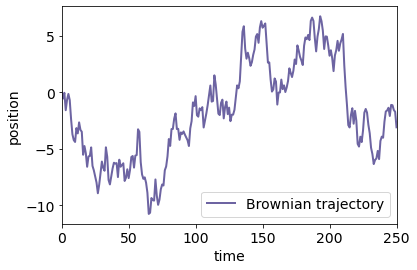

In [11]:
# One dimensional simulation of one Brownian particle
sigma = 1
max_steps = 250
xlist=[0]
for i in range(max_steps):
    xcurrent = xlist[i] 
    xnew = xcurrent + np.random.normal(0,sigma)
    xlist.append(xnew)

# Plot position as function of time
plt.plot(xlist, color='darkslateblue', alpha=0.8, lw=2, label="Brownian trajectory")
plt.xlim([0,max_steps])
plt.xlabel("time")
plt.ylabel("position")
plt.legend();

In the next interactive plot, we plot up to 200 trajectories. Move the slider to reduce or increase the number of trajectories being plotted. Do you see any pattern?

In [30]:
# Bokeh interactive plot for many 1D Brownian trajectories
sigma = 1
max_steps = 250
num_trajectories = 200
trajectories = []
for n in range(num_trajectories):
    # One dimensional simulation of one Brownian particle
    xlist=[0]
    for i in range(max_steps):
        xcurrent = xlist[i] 
        xnew = xcurrent +  np.random.normal(0,sigma)
        xlist.append(xnew)
    trajectories.append(xlist)

time = np.array([range(max_steps)]*num_trajectories)

mypalette = viridis(num_trajectories)
alpha_array = [0.5]*num_trajectories

source = ColumnDataSource(data=dict(t = time, trajs = trajectories, palette = mypalette, opacity = alpha_array))

plot = figure(x_range=(0, max_steps), plot_width=450, plot_height=300, tools="pan,wheel_zoom,reset") 
plot.title.text = '1D Brownian trajectories'
plot.title.text_font_size = '12pt'
plot.toolbar.logo = None

plot.xaxis.axis_label = 'time'
plot.yaxis.axis_label = 'position'

plot.multi_line(xs="t", ys='trajs', line_color='palette', line_alpha='opacity', line_width=2, source=source)

num_trajs_slider = Slider(start=1, end=num_trajectories, 
                          value=num_trajectories, step=1, title="Number of trajectories")

callback = CustomJS(args=dict(source=source, num_trajs=num_trajs_slider),
                    code="""
    const data = source.data;
    const opacity = data['opacity']
    const max_trajs = num_trajs.value;
    for (var i = 0; i < opacity.length; i++) {
        if (i < max_trajs) {
            opacity[i] = 0.5
        } else {
            opacity[i] = 0.0
        }
    }
    source.change.emit();
""")

num_trajs_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(num_trajs_slider),
)

show(layout)

Indeed it seems particles have a tendency to spread outwards while still having their average position close to their stating position, i.e close to zero. We will continue exploring the one-dimensional model in the next section, but to finlize this section, lets look to something closer to reality. We can easily extend this model to two or more dimensions by sampling a random number the same way for each additional axis. This way we can simulate a Brownian trajectory in two dimensions and plot it

In [23]:
# Two dimensional simulation of one Brownian particle
mu = 0
sigma = 1
dimension = 2
max_steps = 401
positions = np.zeros([max_steps, 2]) # initial position (0,0)
sigma = 1
for t in range(max_steps - 1):
    positions[t+1] = positions[t] + np.random.normal(mu,sigma,dimension)

where the function `np.random.normal(mu,sigma,dimension)` now accepts a third argument corresponding to the dimension. This function outputs two independently sampled normal numbers, one for each dimension. We can use this data to produce an interactive plot. You can adjust the time slider to see the movement of the Brownian particle through time.

In [24]:
# Bokeh interactive plot code for 2D trajectory
minval = np.min(positions)
maxval = np.max(positions)

xpositions = positions[:,0]
ypositions = positions[:,1]

source = ColumnDataSource(data=dict(x=xpositions, y=ypositions))
original = ColumnDataSource(data=dict(x=xpositions, y=ypositions))
source_dot = ColumnDataSource(data=dict(x=[xpositions[-1]], y=[ypositions[-1]]))


plot = figure(x_range=(minval, maxval), y_range=(minval, maxval), plot_width=400, 
              plot_height=400, tools="pan,wheel_zoom,reset") #toolbar_location=None)
plot.title.text = '2D Brownian trajectory'
plot.title.text_font_size = '12pt'
plot.toolbar.logo = None

trajectory = plot.line('x', 'y', source=source, line_width=2, line_alpha=0.6, color='#1f1f7a')
particle = plot.circle('x', 'y', source=source_dot, size = 10, alpha=0.6, color="red")

legend = Legend(items=[('Brownian particle', [particle]), 
                       ('Brownian trajectory', [trajectory])], 
                orientation="horizontal")
plot.add_layout(legend, 'below')
legend.click_policy="hide"


time_slider = Slider(start=0, end=max_steps-1, value=max_steps-1, step=1, title="Time")

callback = CustomJS(args=dict(source=source, source_dot=source_dot, original=original, time=time_slider),
                    code="""
    const data = source.data;
    const data_dot = source_dot.data;
    const original_data = original.data
    const t = time.value;
    const x = data['x']
    const y = data['y']
    const xtrue = original_data['x']
    const ytrue = original_data['y']
    const xdot = data_dot['x']
    const ydot = data_dot['y']
    for (var i = 0; i < x.length; i++) {
        if (i < t) {
            x[i] = xtrue[i]
            y[i] = ytrue[i]
        } else {
            x[i] = xtrue[t]
            y[i] = ytrue[t]
        }
    }
    xdot[0] = xtrue[t] 
    ydot[0] = ytrue[t] 
    source.change.emit();
    source_dot.change.emit();
""")

time_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(time_slider),
)

show(layout)

Note every time the code is simulated the trajectory will be different since it is resampled every time. Now try to zoom out and move the time slider. To zoom out activate the zoom function in the interactive controls next to the plot. Zoom ot more and try again. Does the movement of the particle look similar to the movement of the particles in the initial video?

## 3. Emergent colletive behavior

In this section, we will show how a collective behavior emerges from the individual movement of the Brownian particles. One can mathematically show the collective behavior of the Brownian particles in one dimension follows
 
$$
\frac{\partial \rho}{\partial t} = D\frac{\partial^2 \rho(x)}{\partial x^2},
$$

where $\rho(x,t)$ is the distribution of particles in $x$ at a given time $t$. If you don't understand this equation, don't worry; it requires more advanced mathematics beyond the scope of this book. It is a partial differential equation, and it models several physical process, such as the difussion of heat, and it is called the difussion equation. The value of $D$ is called the diffusion coefficient, and it is related to the value of the standard deviation of our simulations above by $D=\frac{\sigma^2}{2}$. The form of the equation is not important, we just care that it exists and that it has a solution, which is a function of position and time. Assuming all the particles are concentrated at $x=0$ at time 0, the emergent behavior is given by the solution of this equation, which is

$$
\rho(x,t) = \frac{1}{ \sqrt{4\pi D t}} \exp \Big( -\frac{x^2}{4Dt}\Big).
$$

Given a value of time $t$, say $t=100$, we can easily plot this function as a function of $x$. If what I say is correct, this should be the distribution that our Brownian particles should obey at time $t=100$.

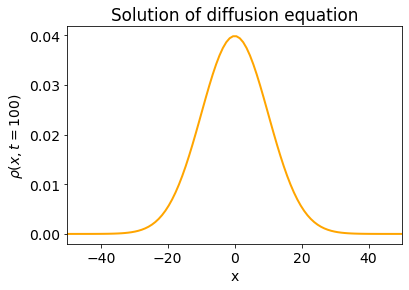

In [15]:
x = np.linspace(-50, 50, 100)
time = 100
sigma = 1
D = sigma*sigma/2
distribution = 1/np.sqrt(4 * np.pi * D * time) * np.exp(-x*x/(4 * D * time))
plt.plot(x, distribution, lw =2, color='orange')
plt.xlabel('x')
plt.ylabel(r'$\rho(x,t=$' +str(time) + ')')
plt.title('Solution of diffusion equation')
plt.xlim([-50,50]);

To verify the emergent collective behavior of the particles is indeed of this form, we can simply simulate a bunch of Brownian particles and check how they are distributed at a given time. We thus follow the next steps:

1. Simulate a large number of identical Brownian particles in one dimension.
2. Create a histogram of the distribution of Brownian particles at each point in time.
3. Plot the histogram of the distribution for a given time.

We write two python functions to facilitate doing these steps. Try to read the code and the comments to understand what each function does. The first function calculates a Brownian trajectory given its initial position, the corresponding value of $\sigma$ and the total number of time iterations (the length of the trajectory). The second function, given a time and the trajectories of many Brownian particles, extracts the positions of the particles at a given time.

In [16]:
def calculate_brownian(xinitial, sigma, maxsteps):
    '''
    Function to calculate the trajectory of one Brownian particle in one dimension 
    
    :param xinitial: initial position of trajectory
    :param sigma: standard deviation of normal dsitribution to sample random number
    :param maxsteps: total number of time steps taken
    :return: brownian trajectory in the form of an array with each entry the 
    position at the corresponding time step
    '''
    xlist=[xinitial]
    for i in range(maxsteps):
        xcurrent = xlist[i] 
        xnew = xcurrent + sigma * np.random.normal(0,1)
        xlist.append(xnew)
    return np.array(xlist)

def extract_positions(timestep, brownian_trajs):
    '''
    Function to extract positions of all the Brownian particles at a given time step
    
    :param timestep: timestep at which to extract positions (equal to time in this notebook)
    :param brownian_trajs: array of brownian trajectories, where each entry is the
    complete trajectory of a brownian particle
    :return: array containing the positions of all Brownian particles at the given timestep
    '''
    positions = []
    numparticles = len(brownian_trajs)
    for i in range(numparticles):
        positions.append(brownian_trajs[i][timestep])
    return positions

We can use these functions to calculate and plot the distribution of many Brownian particles at any given time.

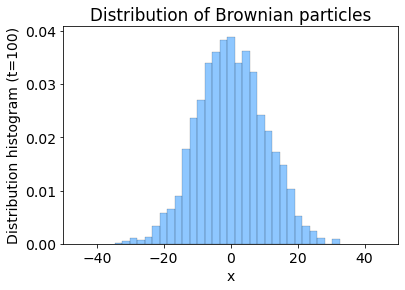

In [26]:
x0 = 0 # initial position for all particles
sigma = 1
max_steps = 250
num_particles = 2000

# Calculates trajetory of all Brownian particles and saves data in brownian_trajectories
brownian_trajectories = []
for i in range(num_particles):
    brownian_trajectory = calculate_brownian(x0, sigma, max_steps)
    brownian_trajectories.append(brownian_trajectory)

# Plot the histogram of the distribution of Brownian particles
time = 100
positions = extract_positions(time, brownian_trajectories)
plt.hist(positions, 30, density=True, alpha=0.5, color='dodgerblue', edgecolor='black', lw=0.3)
plt.xlabel('x')
plt.ylabel('Distribution histogram (t=' + str(time) + ')')
plt.title('Distribution of Brownian particles')
plt.xlim([-50,50]);

Now we want to compare the two results. We do this all at once and interactively to really show how the histograms calculated from the positions of Brownian particles at any given time obeys the corresponding distribution given by the diffusion equation.

In [27]:
sigma = 1
D = sigma*sigma/2
xdomain = np.linspace(-50, 50, 100)
hist_list = []
leftedges_list = []
rightedges_list = []
pdf_list = []
for i in range(max_steps):
    time = i+1
    positions_particles = extract_positions(time, brownian_trajectories)
    hist, edges = np.histogram(positions_particles, density=True, bins=30)
    hist_list.append(hist)
    leftedges_list.append(edges[:-1])
    rightedges_list.append(edges[1:])
    pdf = 1/np.sqrt(4 * np.pi * D * time) * np.exp(-xdomain*xdomain/(4 * D * time))
    pdf_list.append(pdf)


sourceHist = ColumnDataSource(data=dict(hist_data= hist_list[max_steps-1], 
                                        leftedges_data = leftedges_list[max_steps-1],
                                        rightedges_data = rightedges_list[max_steps-1]))
sourcePDF = ColumnDataSource(data=dict(x=xdomain, pdf_data=pdf_list[max_steps-1]))
sourceMain = ColumnDataSource(data=dict(hist_data= hist_list, 
                                        leftedges_data = leftedges_list,
                                        rightedges_data = rightedges_list,
                                        pdf_data = pdf_list))



plot = figure(x_range=(-50,50), y_range=(0,0.2), plot_width=400, plot_height=400, tools="pan,wheel_zoom,reset")
plot.title.text = 'Distribution of 1D Brownian trajectories'
plot.title.text_font_size = '12pt'
plot.toolbar.logo = None

histogram = plot.quad(top='hist_data', bottom=0, left='leftedges_data', 
                      right='rightedges_data', source = sourceHist, alpha=0.6, color='#0066ff')
distribution = plot.line('x', 'pdf_data', source = sourcePDF, line_color="orange", line_width=4, alpha=0.7)

legend = Legend(items=[('Distribution of Brownian particles', [histogram]), 
                       ('Diffusion equation solution', [distribution])])
plot.add_layout(legend)
legend.click_policy="hide"

plot.xaxis.axis_label = 'x'
plot.yaxis.axis_label = 'Pr(x)'

time_slider = Slider(start=1, end=max_steps, value=max_steps, step=1, title="Time")

callback = CustomJS(args=dict(sourceHist=sourceHist, sourcePDF=sourcePDF, sourceMain=sourceMain, time=time_slider),
                    code="""
    const dataHist = sourceHist.data;
    const dataPDF = sourcePDF.data;
    const dataMain = sourceMain.data;
    
    const t = time.value - 1;
    const x = dataPDF['x'];
    const pdf = dataPDF['pdf_data'];
    const hist_data = dataHist['hist_data'];
    const leftedges_data = dataHist['leftedges_data'];
    const rightedges_data = dataHist['rightedges_data'];
    
    const pdf_main = dataMain['pdf_data'];
    const hist_data_main = dataMain['hist_data'];
    const leftedges_data_main = dataMain['leftedges_data'];
    const rightedges_data_main = dataMain['rightedges_data'];

    
    for (var i = 0; i < x.length; i++) {
        pdf[i] = pdf_main[t][i]
    }
    for (var i = 0; i < hist_data.length; i++) {
        hist_data[i] = hist_data_main[t][i];
        leftedges_data[i] = leftedges_data_main[t][i];
        rightedges_data[i] = rightedges_data_main[t][i];
    }
        
    sourceHist.change.emit();
    sourcePDF.change.emit();
""")

time_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(time_slider),
)

show(layout)

This shows the emergent behavior from the colective motion of Brownian particles follows a very predictable form given by the diffusion equation. As a final representation of Brownian motion, we present below an interactive plot of many one dimensional Brownian trajectories as a function of time, together with its corresponding distribution. One can vary the total number of trajectories used to calculate the distirbution and the time at which it is calculated. It clearly shows one needs a large enough sample to generate a reasonable distribution.  

In [28]:
# Bokeh interactive plot for many 1D Brownian trajectories
sigma = 1
max_steps = 300
stepsize = 10
num_trajectories = 250
steptrajs = 10
trajectories = []
x0 = 0
times = np.array([range(max_steps)]*num_trajectories)

for n in range(num_trajectories):
    # One dimensional simulation of one Brownian particle
    trajectory = calculate_brownian(x0, sigma, max_steps)
    trajectories.append(trajectory)
    
# Calculates all possible histograms
hist_all = []
edgesbottom_all = []
edgestop_all = []
# For any possible number of trajectories
for j in range(int(num_trajectories/steptrajs) + 1):
    hist_array = []
    edgesbottom_array = []
    edgestop_array = []
    maxtrajs_plot = j*steptrajs
    # For any possible time
    for i in range(int(max_steps/stepsize)+1):
        time_i = i * stepsize
        if j>0:
            positions = extract_positions(time_i, trajectories[0: maxtrajs_plot])
            hist, edges = np.histogram(positions, bins=30, density=True)
            hist_array.append(hist)
            edgesbottom_array.append(edges[:-1])
            edgestop_array.append(edges[1:])
        else:
            hist_array.append([])
            edgesbottom_array.append([])
            edgestop_array.append([])
    hist_all.append(hist_array)
    edgesbottom_all.append(edgesbottom_array)
    edgestop_all.append(edgestop_array)

mypalette = viridis(num_trajectories)
alpha_array = [0.5]*num_trajectories

source = ColumnDataSource(data=dict(t = times, trajs = trajectories, palette = mypalette, opacity = alpha_array))
sourceHist = ColumnDataSource(data=dict(hist = hist_all[-1][-1], 
                                        edgesbottom = edgesbottom_all[-1][-1], 
                                        edgestop = edgestop_all[-1][-1]))
sourceMaster = ColumnDataSource(data=dict(histarray = hist_all, 
                                          edgesbottomarray = edgesbottom_all,
                                          edgestoparray = edgestop_all))

# Plot trajectories
plot_trajs = figure(x_range=(0, max_steps-0.01), y_range=(-45, 45), plot_width=400, plot_height=300, 
              tools="pan,wheel_zoom,reset", toolbar_location="above") 
plot_trajs.title.text = '1D Brownian trajectories'
plot_trajs.title.text_font_size = '12pt'
plot_trajs.toolbar.logo = None
plot_trajs.xaxis.axis_label = 'time'
plot_trajs.yaxis.axis_label = 'position'
plot_trajs.multi_line(xs="t", ys='trajs', line_color='palette', line_alpha='opacity', line_width=2, source=source)
# Plot time indicator line
span = Span(location=max_steps, dimension='height', line_color='black', line_dash='dashed', line_width=2)
plot_trajs.renderers.extend([span])

# Plot distribution (histogram)
plot_hist = figure(toolbar_location=None, plot_width=250, plot_height=plot_trajs.plot_height, 
                   x_range=(0, 0.1), y_range=plot_trajs.y_range, y_axis_location=None)
plot_hist.xaxis.major_label_orientation = np.pi/4
plot_hist.title.text = 'Distribution of particles'
plot_hist.title.text_font_size = '12pt'
plot_hist.quad(left=0, bottom='edgesbottom', top='edgestop', right='hist', alpha=0.5, 
               color='#0066ff', source=sourceHist)

num_trajs_slider = Slider(start=0, end=num_trajectories, 
                          value=num_trajectories, step=steptrajs, title="Number of trajectories")
time_slider = Slider(start=0, end=max_steps, value=max_steps, step=stepsize, title="Time")

callback = CustomJS(args=dict(span=span, source=source, sourceHist=sourceHist, sourceMaster=sourceMaster, 
                                   time = time_slider, num_trajs=num_trajs_slider, 
                                   stepsize = stepsize, steptrajs=steptrajs),
                    code="""
    const data = source.data;
    const dataHist = sourceHist.data;
    const dataMaster = sourceMaster.data;
    
    const opacity = data['opacity']
    const hist_data = dataHist['hist'];
    const edgesbottom_data = dataHist['edgesbottom'];
    const edgestop_data = dataHist['edgestop'];
    const hist_data_master = dataMaster['histarray']
    const edgesbottom_data_master = dataMaster['edgesbottomarray']
    const edgestop_data_master = dataMaster['edgestoparray']
    
    const t = time.value
    const max_trajs = num_trajs.value
    const tint = t/stepsize
    const maxtjint = max_trajs/steptrajs
    
    for (var i = 0; i < opacity.length; i++) {
        if (i < max_trajs) {
            opacity[i] = 0.5
        } else {
            opacity[i] = 0.0
        }
    }    
    for (var i = 0; i < hist_data.length; i++) {
        hist_data[i] = hist_data_master[maxtjint][tint][i]
        edgesbottom_data[i] = edgesbottom_data_master[maxtjint][tint][i]
        edgestop_data[i] = edgestop_data_master[maxtjint][tint][i]
    }
        
    span.location = t 
    
    span.change.emit()
    source.change.emit();
    sourceHist.change.emit();
""")


num_trajs_slider.js_on_change('value', callback)
time_slider.js_on_change('value', callback)


layout = column(
    row(
    plot_trajs,
    plot_hist),
    column(num_trajs_slider, time_slider),
)

show(layout)

```{Note}
One final note about the equation we are solveing. We used this equation to simulte Brownian motion

$$
x(t+1) = x(t) + \mathcal{N}(0,\sigma)  \\[5mm]
$$

A more general equation would use a continuous variable for time. This means looking at $x(t+\Delta t)$ instead of $x(t+1)$. This would modify the equation to

$$
x(t+\Delta t) = x(t) + \mathcal{N}(0,\sigma\sqrt{\Delta t}).
$$

The addition of $\sqrt{\Delta t}$ is not obvious, and it is closely related to the essence of stochastic calculus (also known as Ito calculus). Actually this last equation corresponds to the discretization of the stochastic differential equation

$$
dX_t = \sigma dW_t,
$$

which is the equation that describes standard Brownian motion. The required mathematics to understand this equation are beyond the scope of this book, but the interested reader can investigate further on its own. Our simulation of Brownian trajectories presented above corresponds to a numerical scheme, called Euler-Maruyama, to solve this equation.
```

## 5. Concluding remarks

- We derived the Einstein relation that establishes a relation between diffusion and dissipation in Brownian particles. This is a fundamental result to connect the microscopic world described by the dynamics of particles with the macroscopic emergent phenomena such as diffusion. 

- We introduced the dynamics of individual Brownian particles through a simulation scheme, and we showed how it can be extended to two (or more) dimensions. We hint at the connection to the field of stochastic differential equations, which is the mathematically correct approach to understand Brownian motion. This theory correspond to the microscopic theory (bottom).

- We showed that the diffusion equation emerges from the dynamics of a large number of Brownian particles. This corresponds to the macroscopic theory (top). Although we used Fick's law (an emergent law) to derive the equation. It can be done without it, but it requires more advanced techniques. This is left as a possible project.

- To really show the macroscopic diffusion emerges from the dynamics of a large number of individual Brownian particles, we implemented numerical validation, and we compared the results with the solution to the corresponding diffusion equation. We finally show the final form of the stochastic differential equation for Brownian motion.

The studies of Brownian motion not only provided a physical theory to describe Brownian movement; they also gave birth to the field of stochastic differential equations. These equations describe trajectories that are nowhere differentiable, such as idealized Brownian trajectories, and thus require a different type of calculus called Ito calculus. Furthermore, each system of stochastic differential equations has a corresponding emergent "diffusion" equation called the Fokker-Planck equation. This yields a fundamental duality; the stochastic dynamics of individual particles/agents together with the probabilistc dynamics of an ensemble of identical particles/agents are two sides of the same underlying process, an stochastic process. Today, these equations are used in applications ranging from molecular biology to financial mathematics. 

## Historical background overview
(based on {cite}`nelson2020dynamical` Dynamical theories of Brownian motion by Edward Nelson)
- In the early 1800's, the botanist Robert Brown studied the apparently random movement of pollen particles suspended in water, now called Brownian motion. Since practically anyone looking at water through a microscope was able to see little things moving around, he did not discover Brownian motion. However, he did establish Brownian motion as an important phenomenon, and he ruled out the hypothesis that the effect was life-related.
- The phenomenon continued to be studied by several scientists. By 1905, the kinetic theory, that Brownian motion of microscopic particles is caused by bombardment by the molecules of the fluid, seemed the most plausible. However, the attempts failed due to the fractal nature of the velocity of Brownian particles.
- In 1905, Einstein's publishes in one of his Annus Mirabilis papers, where he developed the statistical mechanics and the molecular-kinetic theory of thermodynamics. He did this mostly unaware of the existence of the phenomenon and previous studies. The theory was correct and described consistently the experimental observations of Brownian motion.
- Despite having developed a succesful theory, Einstein's theory does not give a dynamical theory of Brownian motion; it only determines the nature of the motion and the value of the diffusion coefficient on the basis of some assumptions. Smoluchowski and Langevin, independently from Einstein, attempted a dynamical theory, and arrived to similar results. These dynamic theory of Brownian motion was the birth of the field of stochastic differential equations.
- The agreement of these considerations with experience together with Planck’s determination of the true molecular size from the law of radiation (for high temperatures) convinced the sceptics, who were quite numerous at that time (Ostwald, Mach) of the reality of atoms.

## Exercises

1. What is the Einstein's relation for a spherical particle with radius R in a liquid with low Reynolds number and viscosity $\eta$?   (Hint: Investigate the friction of a spherical particle under these conditions and note the friction force equals the velocity times the friction coefficient.)


2. The equation for the time evolution of the position of the Brownian particle as $ x(t+1) = x(t) + \sigma \mathcal{N}(0,1)$ (since we assumed $\Delta t = 1$). Add a term of the form $-\theta x(t)$ with theta a positive constant, then modify the code and implement a simulation of its trajectory in one dimension starting at $x=0$, $\theta=0.01$ and $\sigma = 1$. Plot the position as a function of time. Can you notice anything different? If you don't try plotting the solution for a larger time interval (increase max_steps) and compare with the Brownian motion case $\theta = 0$.  
    
    Remember adding the lines "*import numpy as np*" and "*import matplotlib.pyplot as plt*" at the beginning of your notebook.
    

3. The process simulated in excercise 2 is called ''the Ornstein–Uhlenbeck process''. Investigate its corresponding 'diffusion' equation. In the literature, the 'diffusion' equation for an arbitrary process is refered as the Fokker-Planck equation. What type of equation is this?


4. The solution of the Fokker-Planck equation for the Ornstein–Uhlenbeck process from excercise 3 has the form:

    $$
    \rho(x,t) = \sqrt{\frac{\theta}{2\pi D (1-e^{-2\theta t})}} \exp{\Bigg(-\frac{\theta x^2}{2D (1-e^{-2\theta t})} \Bigg)},
    $$
    assuming all the particles are concentrated at $x=0$ at time $t=0$.

    Numerically show how a large collection of simulated trajectories (excercise 2) produce an emergent behavior by plotting a histogram of the particles distribution. Remember we used $\sigma =1$ and $\theta =0.01$. Check this behavior matches the one given by the solution to the corresponding Fokker-Planck equation. (Hint: Copy and modify the code in section 4 of the lecture. To run the code you might need to install ipywidgets to be able to import "*from ipywidgets import interact*")

```{bibliography} ../_bibliography/references.bib
:style: unsrt
:filter: docname in docnames
```

 Simple Bokeh plot  
xpositions = positions[:,0]
ypositions = positions[:,1]
plot = figure(plot_width=300, plot_height=250, match_aspect=True, tools="pan,wheel_zoom,reset")
plot.line(xpositions, ypositions, line_width=2, line_alpha=0.6)
plot.toolbar.logo = None
show(plot)